In [24]:
#math and linear algebra stuff
import numpy as np
import scipy as sc
import scipy.ndimage as scim
import scipy.signal as sisp

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# Hilbert transform

## Introduction

### Hilbert transform in direct space

Hilbert transform is a very common tool in signal processing. it is a linear operator, that takes a function, say $u(t)$ and poduces a function $\mathcal{H}(u)(t)$ with the same domain.

In the framework of continuous functions, it can be defined as a convolution with the Hilbert kernel $h(t) = \frac{1}{\pi t}$:

\begin{align*}
    \mathcal{H}(u)(t) &=\\
    &= \int_{-\infty}^{\infty} u(\tau)h(t-\tau) d\tau\\
    &= \frac{1}{\pi} \int_{-\infty}^{\infty} \frac{u(\tau)}{t-\tau} d\tau
\end{align*}

Unfortunately, as one may have noticed, there is a problem with this expression :<br>
$u(\tau)h(t-\tau)$ has a singularity in $\tau$

We deal with the signularity problem using Cauchy pricipal value in $\tau$, ie
\begin{align*}
    \mathcal{H}(u)(t) &=\text{p.v} \int_{-\infty}^{\infty} u(\tau)h(t-\tau) d\tau\\
    &= \underset{\epsilon \rightarrow 0^+}{lim} \frac{1}{\pi} \left[ \int_{-\infty}^{t-\epsilon} \frac{u(\tau)}{t-\tau} d\tau + \int_{t+\epsilon}^{\infty} \frac{u(\tau)}{t-\tau} d\tau \right]\\
    &= -\frac{1}{\pi} \underset{\epsilon \rightarrow 0^+}{lim} \int_{\epsilon}^{\infty} \frac{u(t+\tau)-u(t-\tau)}{\tau} d\tau
\end{align*}

As a consequence, it can be shown that $\mathcal{H}(\mathcal{H}(u))(t) = -u(t)$

### Hilbert transform in Fourier space

The expression of the Hilbert transform of a function in Fourier space is much more friendly:
$$
    \mathcal{F}(\mathcal{H}(u))(f) = (-j \text{sign}(f)) \mathcal{F}(u)(f)
$$
$where \mathcal{F}$ is the Fourier transform, $j = \sqrt{-1}, \in \mathbb{I}$ and $\text{sign}$ being defined as:
$$
    \text{sign}(x) =
    \begin{cases}
        -1&{\text{if }} x<0, \\
        0 &{\text{if }} x=0, \\
        1 &{\text{if }} x>0, \\
    \end{cases}
$$

## Hermitian symmetry of real signals

Before jumping onto practical use of Hilbert transform, we must recall some properties of the Fourier transform of even/odd functions in $\mathbb{R}$:<br>

Let $g$ be a real, and square integrable function of $\mathbb{R}$ let's derive its Fourier transform:<br>

\begin{align*}
    \mathcal{F}(g)(f) &= \int_{-\infty}^{\infty} g(x) e^{-2\pi j f x} dx \\
     &= \int_{-\infty}^{\infty} g(x) (cos(-2\pi j f x) + j sin(-2\pi j f x)) dx \\
     &= \int_{-\infty}^{\infty} g(x) cos(-2\pi j f x) dx + j \int_{-\infty}^{\infty} g(x) sin(-2\pi j f x)) dx \\
     &= a(f) + j b(f) \\
\end{align*}

We can see, without doing any additional assumption about $g$, that the Fourier transform of a real a function can be divided into a real part $a(f)$ and an imaginary part $b(f)$

Let's take a closer look a the real part $a(f)$:

\begin{align*}
    a(f) &= \int_{-\infty}^{\infty} g(x) cos(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) cos(-2\pi j f x)) dx + \int_{0}^{\infty} g(x) cos(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) cos(-2\pi j f x)) dx + \int_{0}^{-\infty} g(-x) cos(2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) cos(-2\pi j f x)) dx + \int_{-\infty}^{0} g(-x) cos(-2\pi j f x)) dx  \quad \text{because cos is even}\\
    &= \int_{-\infty}^{0} (g(x)+g(-x)) cos(-2\pi j f x)) dx \\
    &= \int_{-\infty}^{0} (g(x)+g(-x)) cos(-2\pi j (-f) x)) dx \\
    &= a(-f)
\end{align*}

It can easily be seen that, if $g$ is an odd function, then its Fourier transform will be imaginary, anyway, the real part of its Fourier transform will be even

Let's take a closer look a the imaginary part $b(f)$:
\begin{align*}
    b(f) &= \int_{-\infty}^{\infty} g(x) sin(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) sin(-2\pi j f x)) dx + \int_{0}^{\infty} g(x) sin(-2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) sin(-2\pi j f x)) dx + \int_{0}^{-\infty} g(-x) sin(2\pi j f x)) dx\\
    &= \int_{-\infty}^{0} g(x) sin(-2\pi j f x)) dx - \int_{-\infty}^{0} g(-x) sin(-2\pi j f x)) dx  \quad \text{because sin is odd}\\
    &= \int_{-\infty}^{0} (g(x)-g(-x)) sin(-2\pi j f x)) dx \\
    &= -\int_{-\infty}^{0} (g(x)-g(-x)) sin(-2\pi j(-f) x)) dx \\
    &= -b(f)
\end{align*}

It can easily be seen that, if $g$ is an even function, then its Fourier transform will be real and even, anyway, the imaginary part of the Fourier transform of $g$ will always be odd.

We can summarize those informations on the following table:

\begin{array}{c|c|c}
    & \text{Real Part of Fourier transform} & \text{Imaginary Part of Fourier transform} \\
\hline
    \text{Real/Even function} & Even & 0 \\
\hline
    \text{Real/Odd function} & 0 & Odd
\end{array}

And what about functions that are neither even, nor odd ? It is easy to show that all function can actually be expressed as a sum of even and odd:

\begin{align*}
    f(x) &= \frac{1}{2} \left( \underbrace{f(x)+f(-x)}_{even} + \underbrace{f(x)-f(-x)}_{odd} \right)
\end{align*}

We can then conclude that every real signal Fourier transform can be divided into an even real part and an odd imaginary part, which can be formalized as follows:

$$
    \mathcal{F}(g)(-f) = \overline{\mathcal{F}(g)(f)}
$$

Where the $\overline{(.)}$ stands for the complex conjugate. This property is called Hermitian symmetry.

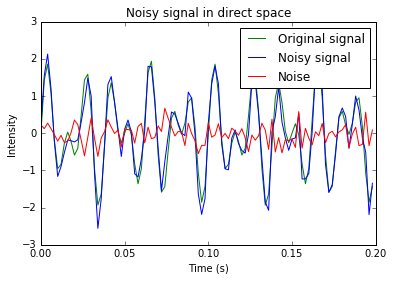

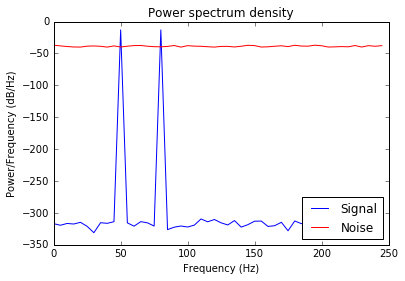

In [3]:
"""
A simple application of Hermitian symmetry : How to generate a real white noise in Fourier domain?

Here, the number of sample if very important, because discrete fourier transform is defined
such that there will always be a zero frequency term.

In the even case, N/2 th DFT term correspond to \sum_i f(i) e(-j\pi i) = \sum_i f(i) e(+j\pi i)
which is considered as the negative part of the next periodic spectrum high frequency

In the even case, we have, as seen \sum_i f(i) e(-j\pi i) = \sum_i f(i) e(+j\pi i) = prod_i e(j \pi).
It can be noticed that a product of a  pure imaginary is real... This term has then a null imaginary part

In the odd case, floor(N/2) stands for positive high frequency and ceil(N/2) for negative high frequency

In practice, this means that there are 2 cases (although index are the same):
-dft for even number of N samples: [0] : 0 freq, [1:N/2] positive freq, [N/2::] negative freq
-dft for odd number of N samples: [0] : 0 freq, [1:(N/2)+1] positive freq, [(N/2)+1::] negative freq :

"""


SAMPLING_FREQ = 500.
NB_SAMPLE = 100 #This number can be either even or odd
FSig = 50.
FSig2 = 80.
intNoise = 10 #ratio of signal power

t = np.arange(NB_SAMPLE)/SAMPLING_FREQ
signal = np.sin(2*np.pi*FSig*t)+np.sin(2*np.pi*FSig2*t)

def GetPosNegFreqPattern(signal):
    firstNegIdx = np.int(np.ceil(len(signal)/2.))
    sPosFreq = len(signal[1:firstNegIdx])
    sNegFreq = len(signal[firstNegIdx::])
    return sPosFreq,sNegFreq

#handle even/odd length cases
sPosFreq,sNegFreq = GetPosNegFreqPattern(signal)

#Random noise : We want noise energy to be a percentage of signal energy
signalEnergy = np.linalg.norm(signal)**2.
binEnergy = (signalEnergy*intNoise)/NB_SAMPLE
minNoise = -np.sqrt(binEnergy)
maxNoise = np.sqrt(binEnergy)

#generate a random white noise for negative frequencies
wnreal = np.random.uniform(minNoise,maxNoise,size=sNegFreq)
#real part is even
wnreal = np.concatenate((wnreal[::-1][0:sPosFreq],wnreal))
#add zero frequency ie DC component
wnreal = np.concatenate(([np.random.choice([minNoise,maxNoise])],wnreal))

#generate a random white noise for negative frequencies
wnim = np.random.choice([-1,1],sNegFreq)*np.sqrt((maxNoise-np.abs(wnreal[::-1][0:sNegFreq][::-1]))**2)
#imaginay part is odd
wnim = np.concatenate((-wnim[::-1][0:sPosFreq],wnim))
#DC component is obviously even, imaginary is zero
wnim = np.concatenate((np.zeros(1),wnim))

#See comment regarding product of pure imaginary
if( NB_SAMPLE%2 == 0):
    wnim[NB_SAMPLE/2] = 0
    wnreal[NB_SAMPLE/2] = np.random.choice([minNoise,maxNoise])

#Actual complex FFT of the noise
noiseSpectrum = wnreal+1j*wnim
noiseDirect = np.fft.ifft(noiseSpectrum)

#Check for Hermitian symmetry
assert( np.isclose(noiseDirect.imag,0).all() )

#Direct Space
plt.figure(0)
plt.plot(t,signal,'g',label='Original signal')
plt.plot(t,signal+noiseDirect.real,'b',label='Noisy signal')
plt.plot(t,noiseDirect.real,'r',label='Noise')
plt.legend()
plt.title("Noisy signal in direct space")
plt.xlabel("Time (s)")
plt.ylabel("Intensity")

#Compute power spectrum density for both noise and signal
f = np.arange(0.,sPosFreq+1)*(SAMPLING_FREQ/NB_SAMPLE)
#np.fft.fftfreq(NB_SAMPLE,1./SAMPLING_FREQ)
psdNoise = (1./(SAMPLING_FREQ*NB_SAMPLE)) * np.abs(noiseSpectrum[0:sPosFreq+1])**2
psdSignal = (1./(SAMPLING_FREQ*NB_SAMPLE)) * np.abs(np.fft.fft(signal)[0:sPosFreq+1])**2

#Fourier space
plt.figure(1)
plt.plot(f,10*np.log10(psdSignal),'b',label='Signal')
plt.plot(f,10*np.log10(psdNoise),'r',label='Noise')
plt.legend(loc=4)
plt.title("Power spectrum density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")

#Of course this methodology can be extended to generate any profile of random noise,
#knowing its Power spectrum density, like pink of blue noise.

## Hilbert transform and analytic signals

We recall that Hilbet transform has a very simple expression in Fourier domain:
$$
    \mathcal{F}(\mathcal{H}(u))(f) = (-j \text{sign}(f)) \mathcal{F}(u)(f)
$$

The presence of the $-j \text{sign}$ function changes evenness of functions as follows:

\begin{array}{c|c|c|c}
    g & \mathcal{F}(g) & \mathcal{F}(\mathcal{H}(g)) & \mathcal{H}(g) \\
\hline
    \text{Real/Even} & \text{Real/Even} & \text{Imaginay/Odd} & \text{Real/Odd} \\
\hline
    \text{Real/Odd} & \text{Imaginay/Odd} & \text{Real/Even} & \text{Real/Even}
\end{array}

However, one of the most important feature of the Hilbert transform, lies in the fact that it can be used to generate analytic signals.<br>

An analytic signal is a function whose Fourier transform has a support restricted to $\mathbb{R}_+$ : it has no negative frequencies.

The analytic signal $s(x)$ corresponding to an arbitrary signal $g(x)$ can be computed using the Hilbert transform as follows
$$
    s(x) = g(x) + j \mathcal{H}(g)(x)
$$

This can be proved easily using the real even / odd imaginary decomposition of the Fourier transform of $g$ seen earlier:

\begin{align*}
    s(x) = g(x) + j \mathcal{H}(g)(x)
    \mathcal{F}(s)(f) &= \mathcal{F}(g)(f) + j \mathcal{F}(\mathcal{H}(g))(f) \\
     &= a(f) + j b(f) + j( -j \text{sign}(f)(a(f) + j b(f) ) ) \\
     &= a(f) + j b(f) + \text{sign}(f)(a(f) + j b(f) ) \\
     &= a(f) + j b(f) + \text{sign}(f)a(f) + j \text{sign}(f)b(f) \\
     &= a(f) + \text{sign}(f)a(f) + j ( b(f) + \text{sign}(f)b(f) ) \\
\end{align*}

As $a(f)$ is even, and $b(f)$ is odd, it can be easily seen that negative frequencies are cancelled:
$$
    \mathcal{F}(s)(f) =
    \begin{cases}
        0 &{\text{if }} f<0, \\
        \mathcal{F}(g)(f) & {\text{if }} f=0, \\
        2\mathcal{F}(g)(f) &{\text{if }} f>0, \\
    \end{cases}
$$

In the exact same manner, we are also able to define $\overline{s(x)} = g(x) - j \mathcal{H}(g)(x)$ the "anti analytic" signal whose positive frequencies are cancelled.

We can see that a numerically efficient way of computing the Hilbert transform would be to use the following property in Fourier domain:
\begin{align*}
    \mathcal{F}(s)(f) &= 2Hv(f) \mathcal{F}(g)(f) \\
\end{align*}

With $Hv$ the Heaviside function defined as follows:
$$
    Hv(x) =
    \begin{cases}
        0 &{\text{if }} x<0, \\
        \frac{1}{2} &{\text{if }} x=0, \\
        1 &{\text{if }} x>0, \\
    \end{cases}
$$

So that we have:
\begin{align*}
    \mathcal{F}(s)(f) &= 2Hv(f) \mathcal{F}(g)(f) \\
    \mathcal{F}(g)(f) + j \mathcal{F}(\mathcal{H}(g))(f) &= 2Hv(f) \mathcal{F}(g)(f) \\
    j \mathcal{F}(\mathcal{H}(g))(f) &= (2Hv(f) - I) \mathcal{F}(g)(f) \\
    \mathcal{H}(g)(x) &=  \mathcal{F}^{-1}( -j (2Hv(f) - I) \mathcal{F}(g))(x) \\
\end{align*}

In [4]:
#Let's try to implement the Hilbert transform

def GetHeaviside( (sPosFreq, sNegFreq) ):
    Heaviside = np.concatenate(([0.5],np.ones(sPosFreq)))
    return np.concatenate((Heaviside,np.zeros(sNegFreq)))

#Compute Hilbert transform thanks to previous formula
def GetHilbertTransform( signal ):
    Heaviside = GetHeaviside(GetPosNegFreqPattern(signal))
    return np.fft.ifft(-1j*(2*Heaviside-1)*np.fft.fft(signal))

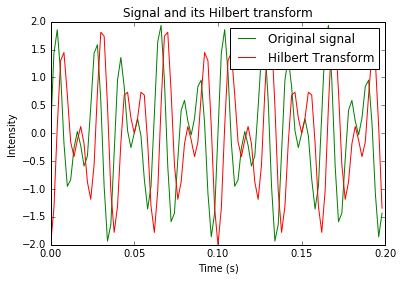

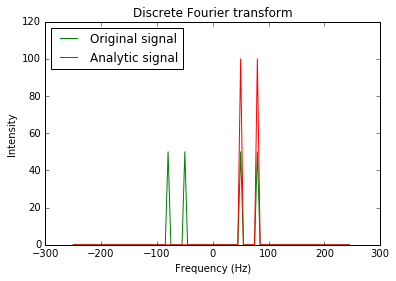

In [5]:
#Use hilbert transform
hilbertSignal=GetHilbertTransform(signal)
#Check for Hermitian symmetry: Hilbert transform of real signal is real
assert( np.isclose(hilbertSignal.imag,0).all() )
     
#Compute Analytic signal using 2 methods
Heaviside = GetHeaviside(GetPosNegFreqPattern(signal))
analyticSignal0 = np.fft.ifft(2*Heaviside*np.fft.fft(signal))
analyticSignal1 = signal +1j*hilbertSignal
assert( np.isclose(analyticSignal0,analyticSignal1).all() )
analyticSignal = analyticSignal0

#Direct Space
plt.figure(0)
plt.plot(t,signal,'g',label='Original signal')
plt.plot(t,hilbertSignal.real,'r',label='Hilbert Transform')
plt.legend()
plt.title("Signal and its Hilbert transform")
plt.xlabel("Time (s)")
plt.ylabel("Intensity")

f = -np.arange(sNegFreq,0,-1)*(SAMPLING_FREQ/NB_SAMPLE)
f = np.concatenate((-f[::-1][0:sPosFreq],f))
f = np.concatenate(([0],f))
f = np.fft.fftshift(f)
#np.fft.fftfreq(NB_SAMPLE,1./SAMPLING_FREQ)
dftSignal = np.abs(np.fft.fftshift(np.fft.fft(signal)))
dftAnalytic = np.abs(np.fft.fftshift(np.fft.fft(analyticSignal)))

#Fourier space
plt.figure(1)
plt.plot(f,dftSignal,'g',label='Original signal')
plt.plot(f,dftAnalytic,'r',label='Analytic signal')
plt.legend(loc=2)
plt.title("Discrete Fourier transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")

## Hilbert transform for multidimensional signals

Although the properties of the Hilbert Transform are known for a long time, and used in telecommunications to perform single side band modulation (SSB), its use in multidimensional discrete signal processing seems more recent.

Here, we will present one very short example of what can be achieved using 1D Hilbert transform for 2D signal processing, which is at the root of the idea of complex wavelets, and especially the Dual Tree Complex Wavelets.

### Idea of separable convolution

In the field of multidimensional signal processing, when filtering is needed, one generally seek for separable kernels. For instance in 2D, if we want to apply a $3\times3$ filter on an image, the cost of the convolution, per pixels is $3\times3=9$ multiply-add operations.

But imagine know that the 2D kernel, when written as a matrix $K$, is actually a rank 1 matrix. It means that there is only one non-zero eigen vector, and that each column of the matrix is actually a multiple of the eigenvector.<br>

This kind of construction, the rank 1 matrix can be viewed as a dyadic a.k.a a second order tensor, and is the result of the outer product a.k.a tensor product a.k.a dyadic product of two vectors (order 1 tensor). We can write:
$$
    K = x y^{\intercal}
$$

Where $K \in \mathbb{R}^{n\times n}$, $x \in \mathbb{R}^n$ and $y \in \mathbb{R}^n$, such that:
$$
    \begin{pmatrix}
        x_0\\
        x_1\\
        \vdots\\
        x_{n-1}
     \end{pmatrix}
     \begin{pmatrix}
         y_0 & y_1 & \dots & y_{n-1}
     \end{pmatrix} =
     \begin{pmatrix}
        x_0 y_0 & x_0 y_1 & \dots & x_0 y_{n-1}\\
        x_1 y_0 & x_1 y_1 & \dots & x_1 y_{n-1}\\
        \vdots\\
        x_{n-1} y_0 & x_{n-1} y_1 & \dots & x_{n-1} y_{n-1}\\
     \end{pmatrix}
$$

This decomposition would allow us perform the 2D convolution, by first, performing a vertical 1D convolution with the filter x, and then perform a hoizontal 1D convolution with the vector y. We would get the exact same result at the cost of $2\times3=6$ multiply-add.

In practice, we would like to know, how to factorize the matrix $K$ as a tensor product of two vectors, let's see how to do this.

### Factorizing rank 1 matrix as a tensor product of vectors

As $K$ is of rank 1, a simple eigenvalue decomposition should give us the only eigen vector we call $t$ whose corresponding eigenvalue $\lambda$ is non-zero.<br>

We can write
\begin{align*}
    K t &= \lambda t \\
    x y^{\intercal} t &= \lambda t \\
    x \underbrace{y^{\intercal} t}_{\text{this is a scalar}} &= \underbrace{\lambda}_{\text{this is a scalar}} t
\end{align*}

Which can be true only in two cases:
$$
\begin{cases}
    y^{\intercal} t = 0 \; \text{t is in the nullspace of K} \\
    x = t \; \text{and} \; \lambda = y^{\intercal} t
\end{cases}
$$

As $t$ is the eigen vector related to the only non-zero eigenvalue, it is not in the nullspace of $K$, but in the nullspace of $K-\lambda I$, so the second case must hold.

We got our first vector of the factorization : $x = t$.

Finding the other one, $y$ is quasi direct, because, we can take the $i^{th}$ row from $K$, we call $K_{i}$ such that $t_i$, the $i^{th}$ element of $t$ is non zero, and derive a diagonal system from it : $diag(t_{i}) y = K_{i}$ and obtain $y = diag(t_{i})^{-1} K_{i}$

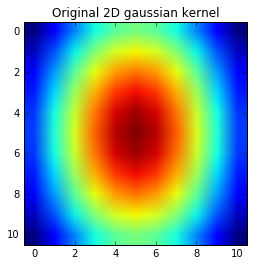

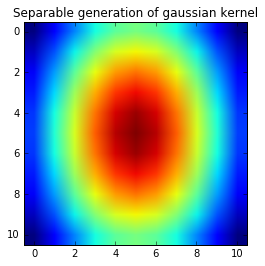

In [6]:
"""
Let's see how to factorize the discretisation of a
gaussian kernel with the method seen previously
"""
#define mesh
sizeK = 11 # must be odd
X,Y=np.meshgrid(np.linspace(-1,1,sizeK),np.linspace(-1,1,sizeK))
xvec = np.array([np.reshape(X,X.size),np.reshape(Y,Y.size)])

#define gaussian
Sigma=np.diag([0.5,1])
mu = np.array([[0],[0]])
coef = 1/np.sqrt(np.power(2*np.pi,2)*np.linalg.det(Sigma))

#2-dimensional gaussian pdf
test=np.dot(np.linalg.inv(Sigma),xvec-mu)
K=coef * np.exp(-0.5* np.sum(test*(xvec-mu),0))
K=np.reshape(K,X.shape)/K.sum()

plt.figure(0)
plt.title("Original 2D gaussian kernel")
plt.imshow(K)

#Now let's factorize it
lamb,t=np.linalg.eig(K)
idx = lamb.argsort()[::-1][0] #sort values from highest to lowest

#Check that K is rank 1
assert( np.linalg.matrix_rank(K) == 1)

lamb = lamb[idx]
t=t[:,idx]

#get index of first non zero element of t, and solve diagonal system
idx = np.abs(lamb).argsort()[::-1]

#Factorization is obtained
y = np.dot( 1./t[idx], K[idx,:] )
x = t
K2 = np.outer(x,y).real
assert(np.isclose(K,K2).all())

plt.figure(1)
plt.title("Separable generation of gaussian kernel")
plt.imshow(K2)

### Separable convolution of complex filters

We will now imagine that we want to be able to have 2D separable convolution for numerical efficiency, but we also want to be able to perform directional filtering i.e have an impulse response that is not necessarily axis aligned.

One of the solution is the design of analytic filters. Why ? Because if we see the problem in the spectral domain, we can say that we would like to have an impulse response filter that has its PSD not concentrated either along axis, or in the 4 quadrants (hat generate axis aligned of checker board like patterns), but instead at intermidiate position, like in diagonal.

Lets give a more visual insight about what we are talking about:

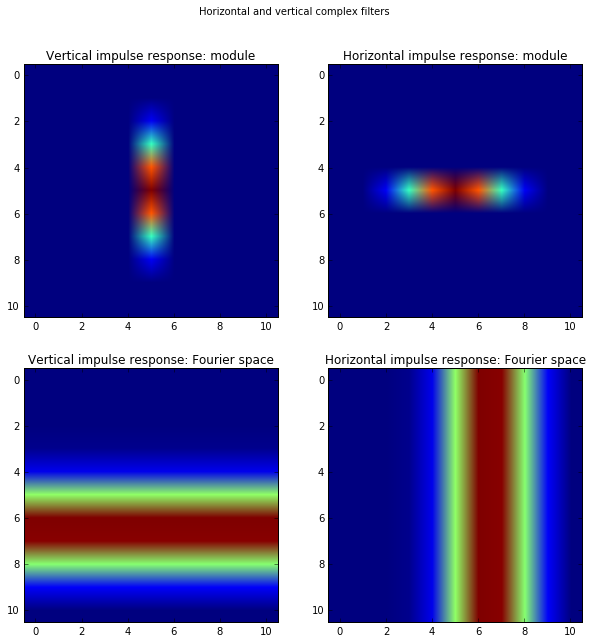

In [7]:
"""
Directional AND separable filters
"""
ksize = 11#must be odd

#In this study, we will be using the antonini synthesis filter
antonini = np.array([-6.453888262893856e-02,
    -4.068941760955867e-02,
    4.180922732222124e-01,
    7.884856164056651e-01,
    4.180922732222124e-01,
    -4.068941760955867e-02,
    -6.453888262893856e-02])

fhsize = len(antonini)/2


#Here we define an analytic filter, with negative frequency cancellation property
vFilter=antonini+1j*GetHilbertTransform(antonini)
hFilter=antonini+1j*GetHilbertTransform(antonini)

#Take a look at 2D impulse response
dirac = np.zeros((ksize,ksize))
dirac[ksize/2,ksize/2]=1

vImpulse = scim.convolve1d(dirac, vFilter.real, axis=0, mode='wrap')\
+1j*scim.convolve1d(dirac, vFilter.imag, axis=0, mode='wrap')
hImpulse = scim.convolve1d(dirac, hFilter.real, axis=1, mode='wrap')\
+1j*scim.convolve1d(dirac, hFilter.imag, axis=1, mode='wrap')

fig = plt.figure(figsize=(10,10))
fig.suptitle("Horizontal and vertical complex filters")

ax = plt.subplot("221")
ax.set_title("Vertical impulse response: module")
ax.imshow(np.abs(vImpulse))

ax = plt.subplot("222")
ax.set_title("Horizontal impulse response: module")
ax.imshow(np.abs(hImpulse))

ax = plt.subplot("223")
ax.set_title("Vertical impulse response: Fourier space")
ax.imshow(np.fft.fftshift(np.abs(np.fft.fft2(vImpulse))))

ax = plt.subplot("224")
ax.set_title("Horizontal impulse response: Fourier space")
ax.imshow(np.fft.fftshift(np.abs(np.fft.fft2(hImpulse))))

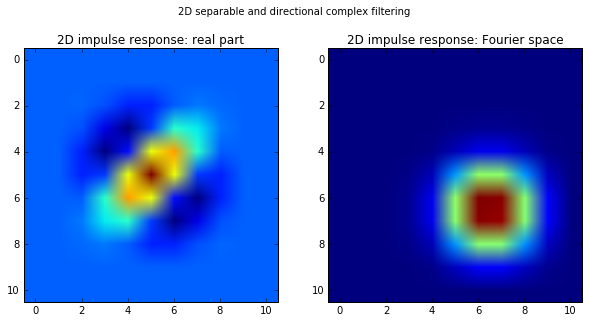

In [8]:
#Now, let see what happen when performing 2D separable convolution with these filters
fig = plt.figure(0,figsize=(10,10))

#2D impulse response : first step of separable convolution
twoDImpulseV = np.complex64( scim.convolve1d(dirac, vFilter.real, axis=0, mode='wrap'))
twoDImpulseV.imag = scim.convolve1d(dirac, vFilter.imag, axis=0, mode='wrap')
#2D impulse response : second step of separable convolution, real part
twoDImpulseH = np.complex64( scim.convolve1d(twoDImpulseV.real, hFilter.real, axis=1, mode='wrap') )
twoDImpulseH.real -= scim.convolve1d(twoDImpulseV.imag, hFilter.imag, axis=1, mode='wrap')
#2D impulse response : second step of separable convolution, imaginary part
twoDImpulseH.imag = scim.convolve1d(twoDImpulseV.real, hFilter.imag, axis=1, mode='wrap')
twoDImpulseH.imag += scim.convolve1d(twoDImpulseV.imag, hFilter.real, axis=1, mode='wrap')
twoDImpulse=twoDImpulseH

#plot things
fig = plt.figure(figsize=(10,5))
fig.suptitle("2D separable and directional complex filtering")

ax = plt.subplot("121")
ax.set_title("2D impulse response: real part")
ax.imshow(twoDImpulse.real)

ax = plt.subplot("122")
ax.set_title("2D impulse response: Fourier space")
ax.imshow(np.fft.fftshift(np.abs(np.fft.fft2(twoDImpulse))))

### Remarks

You can see on the previous example, how a nice diagonal pattern has been created solely by the use of separable convolution of axis aligned 1D filters.<br>
In the framework of dyadic wavelet decomposition, at each step you project your data over two subspaces: the scaling (low pass), and the wavelet (high pass), assuming all filters are analytic, you can derive 3 main direction:
- Low pass vertical, High pass Horizontal: gives something like $15^{\circ}$
- High pass vertical, Low pass Horizontal: gives something like $75^{\circ}$
- High pass vertical, High pass Horizontal: gives something like $45^{\circ}$

Plus, we can also use the complex conjugate of each of the separable filter to derive the positive frequency cancellation property, this give use two times more orientations:
- Low pass vertical analytic, High pass Horizontal anti-analytic: gives something like $165^{\circ}$
- High pass vertical analytic, Low pass Horizontal anti-analytic: gives something like $105^{\circ}$
- High pass vertical analytic, High pass Horizontal anti-analytic: gives something like $135^{\circ}$

In principle, the 2D orientation coverage is quite comprehensive, but the design of wavelet filters with a good spatial/frequency selectivity, a good approximation of the Hilbert transform, and the perfect reconstruction property is far beyond this notebook.

## Generalization of dyadic factorization to rank 2 kernels

Given the work we have done before, we would be really interested in mixing both approaches in order to be able to factorize real 2D convolution kernels (of rank $r\leq 2$) into a single tensor product of complex 1D kernels.

Let's formalize this idea :

\begin{align*}
    K &= real \left( x y^{\intercal} \right) \\
    &= real \left( (x_0 + j x_1) (y_0 + j y_1)^{\intercal} \right) \\
    &= x_0 y_0^{\intercal} - x_1 y_1^{\intercal}
\end{align*}

Nice, as we already master the factorization of rank 1 matrices as dyadic products, this problem now amounts to decomposition of $K$ into a sum of two rank 1 matrices, let's call them $K_1$ and $K_2$.

Is it easy to decompose a matrix into a sum of rank 1 matrices ? It is actually exactly the purpose of the eigen decomposition ! Let's imagine that $K \in \mathbb{R}^k$ is of rank $n$, and let's see how it can be seen as a weighted sum of n rank 1 matrices, thanks to eigen decomposition:

\begin{align*}
    K &= Q \Lambda Q^{-1} \\
    &= ( (v_0)(v_1)\dots(v_{n-1})\dots \dots (v_{k-1}) )
    \begin{pmatrix}
        \lambda_0 & 0 & & \dots & & & 0\\
        0 & \lambda_1 &  & & & & \\
        &  & \ddots & & & & \\
        \vdots & & \ddots & \lambda_{n-1} & \ddots & & \vdots\\
        & & & & 0 & & & & \\
        & & & & & \ddots & \\
        0 & & & \dots & & & 0
    \end{pmatrix}
    \begin{pmatrix}
        \begin{pmatrix}
            u_0^{\intercal}
        \end{pmatrix}
        \\
        \begin{pmatrix}
            u_1^{\intercal}
        \end{pmatrix}
        \\
        \vdots
        \\
        \begin{pmatrix}
            u_{n-1}^{\intercal}
        \end{pmatrix}
        \\
        \vdots
        \\
        \vdots
        \\
        \begin{pmatrix}
            u_{k-1}^{\intercal}
        \end{pmatrix}
    \end{pmatrix} \\
    &=
    ( (v_0)(v_1)\dots(v_{n-1}) \; 0 \dots \; 0 )
    \begin{pmatrix}
        \begin{pmatrix}
            \lambda_0 u_0^{\intercal}
        \end{pmatrix}
        \\
        \begin{pmatrix}
            \lambda_1 u_1^{\intercal}
        \end{pmatrix}
        \\
        \vdots
        \\
        \begin{pmatrix}
            \lambda_{n-1} u_{n-1}^{\intercal}
        \end{pmatrix}
        \\
        0
        \\
        \vdots
        \\
        0
    \end{pmatrix}\\
    &= \sum_{i=0}^{n-1} \lambda_i v_i u_i^{\intercal}
\end{align*}

Which is a weighted sum of dyadic products that generalize what we have seen previously. If we set $n=2$ the rank of the matrix $K$, we can easily identify $x_0,x_1,y_0,y_1$ vectors seen previously:

\begin{align*}
    K &= x_0 y_0^{\intercal} - x_1 y_1^{\intercal} \\
    &= v_0 (\lambda_0 u_0)^{\intercal} - v_1 (-\lambda_1 u_1)^{\intercal}
\end{align*}

The factorization is then given by
$$
    K = real \left( (v_0 + j v_1) ((\lambda_0 u_0) + j (-\lambda_1 u_1))^{\intercal} \right)
$$

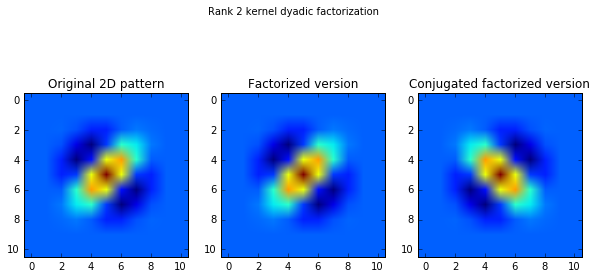

In [11]:
"""
Let's see how to factorize the previous oriented pattern
"""

#Now let's factorize it
lamb,v=np.linalg.eig(twoDImpulse.real)
idx = np.abs(lamb).argsort()[::-1] #sort values from highest to lowest
lamb = lamb[idx]
v[:,range(len(lamb))]=v[:,idx]
u = np.linalg.inv(v)

#check that pattern is rank 2
assert(np.linalg.matrix_rank(twoDImpulse.real)==2)
assert(np.isclose(twoDImpulse.real,np.dot(v,np.dot(np.diag(lamb),u))).all())

cpx1DVec1 = v[:,0] + 1j*v[:,1]
cpx1DVec2 = lamb[0]*u[0,:] + 1j*-lamb[1]*u[1,:]
cpx2DAtom = np.outer(cpx1DVec1,cpx1DVec2)

K2 = cpx2DAtom.real
#Or alternatively, we can see a simple rank-2 appoximation, as in Perona's work:
#K2 = lamb[0]*np.outer(v[:,0],u[0,:])+lamb[1]*np.outer(v[:,1],u[1,:])
assert(np.isclose(twoDImpulse.real,K2).all())

#We can even imagine to use conjugation
K3 = np.outer(cpx1DVec1,np.conj(cpx1DVec2)).real

plt.figure(0,figsize=(10,5))
plt.suptitle("Rank 2 kernel dyadic factorization")
ax = plt.subplot(131)
ax.set_title("Original 2D pattern")
plt.imshow(twoDImpulse.real)
ax = plt.subplot(132)
ax.set_title("Factorized version")
plt.imshow(K2)
ax = plt.subplot(133)
ax.set_title("Conjugated factorized version")
plt.imshow(K3)

### Remarks

Approximation of 2D kernels using a sum of separable 1D filters is known since a long time (See work of P Perona in the early 90's for instance), but the complex interpretation mimicing dual tree wavelets concept, is rather new. 

Moreover, the complex formulation let more room for interpretation, for instance, we get a module and a phase term, which is much more informative and would reinforce the shift invariance of a representation if it was used in a dictionary.

One can argue that this method is limited to rank-2 kernels, this is true, but we now that the best rank-r approximation of a matrix M, in Frobenius norm, according to Eckart-Young theorem, is the truncated singular value decomposition. So any kernel can be easily approximated as a rank-2 matrix using a svd. Once more, in the framework of dictionary learning for instance, appoximation error can ben handled by another directional atom.

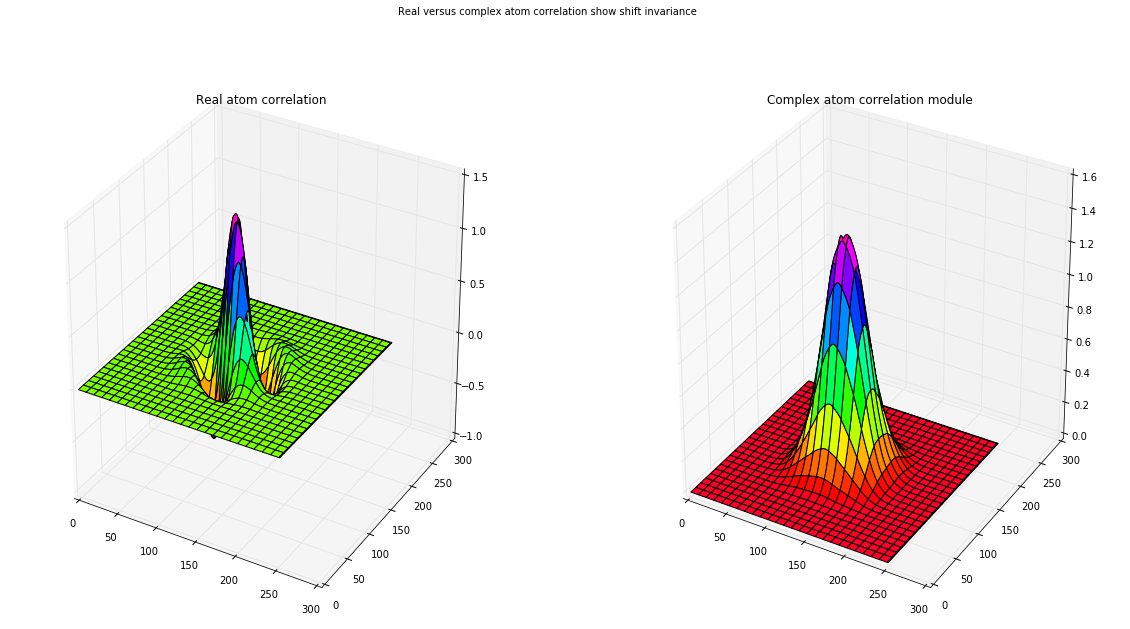

In [38]:
#Checking for "shift invariance" of the complex representation

atom = cpx2DAtom.real

#Let's compute the 2D correlation between original image and the complex atom
cpxCorrel = np.complex64(sisp.convolve2d(atom, cpx2DAtom.real, mode='full', boundary='fill', fillvalue=0))
cpxCorrel.imag = sisp.convolve2d( atom, cpx2DAtom.imag, mode='full', boundary='fill', fillvalue=0)

#prettier plot if resampled
cpxCorrelResamp = np.complex64(scim.zoom(cpxCorrel.real, 12, order=3))
cpxCorrelResamp.imag = scim.zoom(cpxCorrel.imag, 12, order=3)

plt.figure(0,figsize=(20,10))

fig = plt.figure(0)
plt.suptitle("Real versus complex atom correlation show shift invariance")

ogrid = np.lib.index_tricks.nd_grid()
xAxis,yAxis=ogrid[0:cpxCorrelResamp.shape[0],0:cpxCorrelResamp.shape[1]]

ax = fig.add_subplot(121,projection='3d')
ax.set_title("Real atom correlation")
ax.plot_surface(xAxis,yAxis,cpxCorrelResamp.real,cmap='gist_rainbow')

ax = fig.add_subplot(122,projection='3d')
ax.set_title("Complex atom correlation module")
ax.plot_surface(xAxis,yAxis,np.abs(cpxCorrelResamp),cmap='gist_rainbow')

It can be seen in the previous small application that the complex atom correlation module does not present "ripples", so that a small change in position won't be generating too large changes in analysis coefficient for instance.
This is an example of the feature called "shift invariance".

## Bedrosian Identity

Bedrosian's theorem states that the Hilbert transform of the product of a low-pass and a high-pass signal with non-overlapping spectra is given by the product of the low-pass signal and the Hilbert transform of he high-pass signal.

There is still work to find how this can be usefull in engineering ?